# THYROID DISEASE DETECTION -iNeuron.ai

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings as wr
wr.filterwarnings("ignore")

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df=pd.read_csv("thyroid.csv")

In [7]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [8]:
df.drop(["TBG"],axis=1,inplace=True)

In [9]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,SVI,negative


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [11]:
df["sex"].value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

# DataSet Description

### age - Age of the person

### sex - Male or Female

### on_thyroxine - true or false

### on_antithyroid_medication - true or false

### sick - true or false

### pregnant - true or false

### thyroid_surgery - true or false

### I131_treatment - true or false

### query_hypothyroid - true or false

### query_hyperthyroid -true or false

### lithium - true or false

### goitre - true or false

### tumor - true or false

### hypopituitary- true or false

### psych - true or false

### TSH_measured - true or false

### TSH - thyroid stimulating hormone floating value

### T3_measured - true or false

### T3 - triiodothyronine value

### TT4_measured- true or false

### TT4 - Thyroxine value

### T4U_measured- true or false

### T4U - numerical value

### FTI_measured- true or false

### FTI -Free Thyroxine Index

### TBG_measured- true or false

### TBG -Thyroid-Binding Globulin value

### referral_source - different sources of referals

### Class - different types of thyroid

In [12]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [13]:
df.shape

(3772, 29)

In [14]:
df["Class"].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

# Statistical Description

In [15]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,70,2,242,2,147,2,235,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,?,t,?,t,?,t,?,f,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,769,3541,231,3385,387,3387,385,3772,2201,3481


### here the null values denoted by "?"

In [16]:
df[df["age"]=="?"]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
1985,?,F,t,f,f,f,f,f,t,f,...,1.5,t,120,t,0.82,t,146,f,other,negative


In [17]:
#checking number of invalid value like '?' present in each column

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385


In [18]:
count_of_null_values=df["age"][df["age"]=="?"].count()

In [19]:
count_of_null_values

1

In [20]:
# every columns

for column in df.columns:
    
    count=df[column][df[column]=="?"].count()
    
    if count != 0:
        
        print("the null values in",column,"is",count)

the null values in age is 1
the null values in sex is 150
the null values in TSH is 369
the null values in T3 is 769
the null values in TT4 is 231
the null values in T4U is 387
the null values in FTI is 385


In [21]:
pd.set_option("display.max_columns",None)

In [22]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,SVI,negative


In [23]:
# now we selecting required features for detecting thyroid

In [24]:
df=df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured',"query_on_thyroxine","sick","pregnant","I131_treatment","referral_source","query_hypothyroid","query_hyperthyroid","lithium","psych"],axis=1)

In [25]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,f,4.1,2,102,?,?,negative
2,46,M,f,f,f,f,f,f,0.98,?,109,0.91,120,negative
3,70,F,t,f,f,f,f,f,0.16,1.9,175,?,?,negative
4,70,F,f,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,t,f,?,?,?,?,?,negative
3768,68,F,f,f,f,f,f,f,1,2.1,124,1.08,114,negative
3769,74,F,f,f,f,f,f,f,5.1,1.8,112,1.07,105,negative
3770,72,M,f,f,f,f,f,f,0.7,2,82,0.94,87,negative


In [26]:
# now we removeing the null values
# 1st we replace the "?" by NaN

for column in df.columns:
    
    null_values = df[column][df[column]=='?'].count()
    
    if null_values !=0:
        
        df[column] = df[column].replace('?',np.nan)

In [27]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,f,4.1,2,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,f,0.98,NaN,109,0.91,120,negative
3,70,F,t,f,f,f,f,f,0.16,1.9,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,t,f,NaN,NaN,NaN,NaN,NaN,negative
3768,68,F,f,f,f,f,f,f,1,2.1,124,1.08,114,negative
3769,74,F,f,f,f,f,f,f,5.1,1.8,112,1.07,105,negative
3770,72,M,f,f,f,f,f,f,0.7,2,82,0.94,87,negative


In [28]:
# now we checking for "?" value is remaining or not?

for column in df.columns:
    
    count = df[column][df[column]=='?'].count()
    if count==0:
        
        print(column, count)

age 0
sex 0
on_thyroxine 0
on_antithyroid_medication 0
thyroid_surgery 0
goitre 0
tumor 0
hypopituitary 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


In [29]:
# now we fill null values in data set

In [30]:
df.isnull().sum()/df.shape[0]*100

age                           0.026511
sex                           3.976670
on_thyroxine                  0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
goitre                        0.000000
tumor                         0.000000
hypopituitary                 0.000000
TSH                           9.782609
T3                           20.387063
TT4                           6.124072
T4U                          10.259809
FTI                          10.206787
Class                         0.000000
dtype: float64

In [31]:
df.head(9)

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,f,4.1,2,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,f,0.98,NaN,109,0.91,120,negative
3,70,F,t,f,f,f,f,f,0.16,1.9,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
5,18,F,t,f,f,f,f,f,0.03,NaN,183,1.3,141,negative
6,59,F,f,f,f,f,f,f,NaN,NaN,72,0.92,78,negative
7,80,F,f,f,f,f,f,f,2.2,0.6,80,0.7,115,negative
8,66,F,f,f,f,f,t,f,0.6,2.2,123,0.93,132,negative


In [32]:
df["age"].value_counts().idxmax()

'59'

In [33]:
df["age"]=df["age"].fillna(value="59")

In [34]:
df["age"].isnull().sum()

0

In [35]:
df["sex"].value_counts().idxmax()

'F'

In [36]:
df["sex"].isnull().sum()

150

In [37]:
df["sex"]=df["sex"].fillna(value=df["sex"].value_counts().idxmax())

In [38]:
df["sex"].isnull().sum()

0

In [39]:
df.isnull().sum()

age                            0
sex                            0
on_thyroxine                   0
on_antithyroid_medication      0
thyroid_surgery                0
goitre                         0
tumor                          0
hypopituitary                  0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
dtype: int64

In [40]:
df["TSH"].isnull().sum()

369

In [41]:
df["TSH"].value_counts().idxmax()

'0.2'

In [42]:
df["TSH"]=df["TSH"].fillna(value=df["TSH"].value_counts().idxmax())

In [43]:
df["TSH"].isnull().sum()

0

In [44]:
df.shape

(3772, 14)

In [45]:
df.drop(["T3"],axis=1,inplace=True)

In [46]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,f,1.3,125,1.14,109,negative
1,23,F,f,f,f,f,f,f,4.1,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,f,0.98,109,0.91,120,negative
3,70,F,t,f,f,f,f,f,0.16,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,f,0.72,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,t,f,0.2,NaN,NaN,NaN,negative
3768,68,F,f,f,f,f,f,f,1,124,1.08,114,negative
3769,74,F,f,f,f,f,f,f,5.1,112,1.07,105,negative
3770,72,M,f,f,f,f,f,f,0.7,82,0.94,87,negative


In [47]:
df["TT4"].value_counts().idxmax()

'101'

In [48]:
df["TT4"].isnull().sum()

231

In [49]:
df["TT4"]=df["TT4"].fillna(value=df["TT4"].value_counts().idxmax())

In [50]:
df["T4U"].isnull().sum()

387

In [51]:
df["T4U"].value_counts().idxmax()

'0.99'

In [52]:
df["T4U"]=df["T4U"].fillna(value=df["T4U"].value_counts().idxmax())

In [53]:
df["T4U"].isnull().sum()

0

In [54]:
df["FTI"].value_counts().idxmax()

'100'

In [55]:
df["FTI"]=df["FTI"].fillna(value=df["FTI"].value_counts().idxmax())

In [56]:
df["FTI"].value_counts().idxmax()

'100'

In [57]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,f,1.3,125,1.14,109,negative
1,23,F,f,f,f,f,f,f,4.1,102,0.99,100,negative
2,46,M,f,f,f,f,f,f,0.98,109,0.91,120,negative
3,70,F,t,f,f,f,f,f,0.16,175,0.99,100,negative
4,70,F,f,f,f,f,f,f,0.72,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,t,f,0.2,101,0.99,100,negative
3768,68,F,f,f,f,f,f,f,1,124,1.08,114,negative
3769,74,F,f,f,f,f,f,f,5.1,112,1.07,105,negative
3770,72,M,f,f,f,f,f,f,0.7,82,0.94,87,negative


In [58]:
df.isnull().sum()/df.shape[0]*100

age                          0.0
sex                          0.0
on_thyroxine                 0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
goitre                       0.0
tumor                        0.0
hypopituitary                0.0
TSH                          0.0
TT4                          0.0
T4U                          0.0
FTI                          0.0
Class                        0.0
dtype: float64

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df["sex"].value_counts()

F    2630
M    1142
Name: sex, dtype: int64

In [61]:
df["sex"]=le.fit_transform(df["sex"])

In [62]:
df["sex"].value_counts()

0    2630
1    1142
Name: sex, dtype: int64

In [63]:
df["on_thyroxine"].value_counts()

f    3308
t     464
Name: on_thyroxine, dtype: int64

In [64]:
df["on_thyroxine"]=le.fit_transform(df["on_thyroxine"])

In [65]:
df["on_thyroxine"].value_counts()

0    3308
1     464
Name: on_thyroxine, dtype: int64

In [66]:
df["on_antithyroid_medication"].value_counts()

f    3729
t      43
Name: on_antithyroid_medication, dtype: int64

In [67]:
df["on_antithyroid_medication"].value_counts()

f    3729
t      43
Name: on_antithyroid_medication, dtype: int64

In [68]:
df["on_antithyroid_medication"]=le.fit_transform(df["on_antithyroid_medication"])

In [69]:
df["on_antithyroid_medication"].value_counts()

0    3729
1      43
Name: on_antithyroid_medication, dtype: int64

In [70]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,TT4,T4U,FTI,Class
0,41,0,0,0,f,f,f,f,1.3,125,1.14,109,negative
1,23,0,0,0,f,f,f,f,4.1,102,0.99,100,negative
2,46,1,0,0,f,f,f,f,0.98,109,0.91,120,negative
3,70,0,1,0,f,f,f,f,0.16,175,0.99,100,negative
4,70,0,0,0,f,f,f,f,0.72,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,f,f,t,f,0.2,101,0.99,100,negative
3768,68,0,0,0,f,f,f,f,1,124,1.08,114,negative
3769,74,0,0,0,f,f,f,f,5.1,112,1.07,105,negative
3770,72,1,0,0,f,f,f,f,0.7,82,0.94,87,negative


In [71]:
df["thyroid_surgery"].value_counts()

f    3719
t      53
Name: thyroid_surgery, dtype: int64

In [72]:
df["thyroid_surgery"]=le.fit_transform(df["thyroid_surgery"])

In [73]:
df["thyroid_surgery"].value_counts()

0    3719
1      53
Name: thyroid_surgery, dtype: int64

In [74]:
df["goitre"].value_counts()

f    3738
t      34
Name: goitre, dtype: int64

In [75]:
df["goitre"]=le.fit_transform(df["goitre"])

In [76]:
df["goitre"].value_counts()

0    3738
1      34
Name: goitre, dtype: int64

In [77]:
df["tumor"].value_counts()

f    3676
t      96
Name: tumor, dtype: int64

In [78]:
df["tumor"]=le.fit_transform(df["tumor"])

In [79]:
df["tumor"].value_counts()

0    3676
1      96
Name: tumor, dtype: int64

In [80]:
df["hypopituitary"].value_counts()

f    3771
t       1
Name: hypopituitary, dtype: int64

In [81]:
df["hypopituitary"]=le.fit_transform(df["hypopituitary"])

In [82]:
df["hypopituitary"].value_counts()

0    3771
1       1
Name: hypopituitary, dtype: int64

In [83]:
df

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,TT4,T4U,FTI,Class
0,41,0,0,0,0,0,0,0,1.3,125,1.14,109,negative
1,23,0,0,0,0,0,0,0,4.1,102,0.99,100,negative
2,46,1,0,0,0,0,0,0,0.98,109,0.91,120,negative
3,70,0,1,0,0,0,0,0,0.16,175,0.99,100,negative
4,70,0,0,0,0,0,0,0,0.72,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,1,0,0.2,101,0.99,100,negative
3768,68,0,0,0,0,0,0,0,1,124,1.08,114,negative
3769,74,0,0,0,0,0,0,0,5.1,112,1.07,105,negative
3770,72,1,0,0,0,0,0,0,0.7,82,0.94,87,negative


In [84]:
df["Class"].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [85]:
df["Class"]=le.fit_transform(df["Class"])

In [86]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
on_antithyroid_medication    0
thyroid_surgery              0
goitre                       0
tumor                        0
hypopituitary                0
TSH                          0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

In [87]:
df.describe()

,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,Class
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.302757,0.123012,0.011400,0.014051,0.009014,0.025451,0.000265,0.974814
std,0.459512,0.328494,0.106174,0.117716,0.094525,0.157510,0.016282,0.279508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

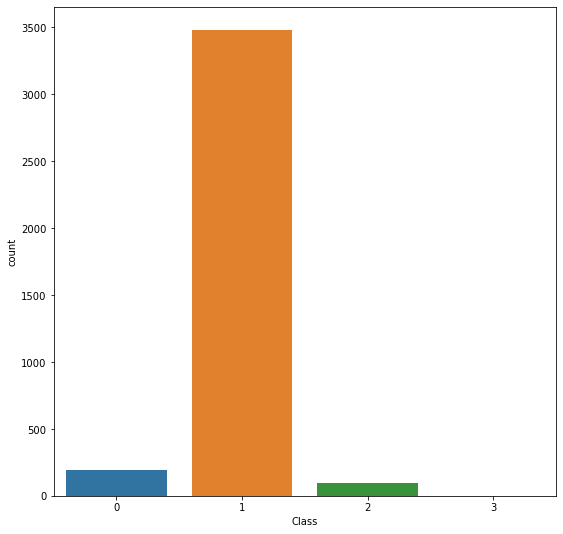

In [88]:
plt.figure(figsize=(9,9))
sns.countplot(df["Class"])

In [89]:
def countplot(data):
    sns.countplot(data)

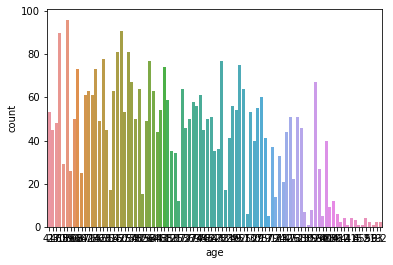

In [90]:
countplot(df["age"])

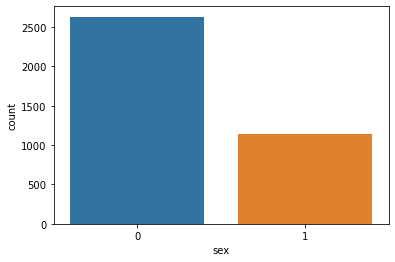

In [91]:
countplot(df["sex"])

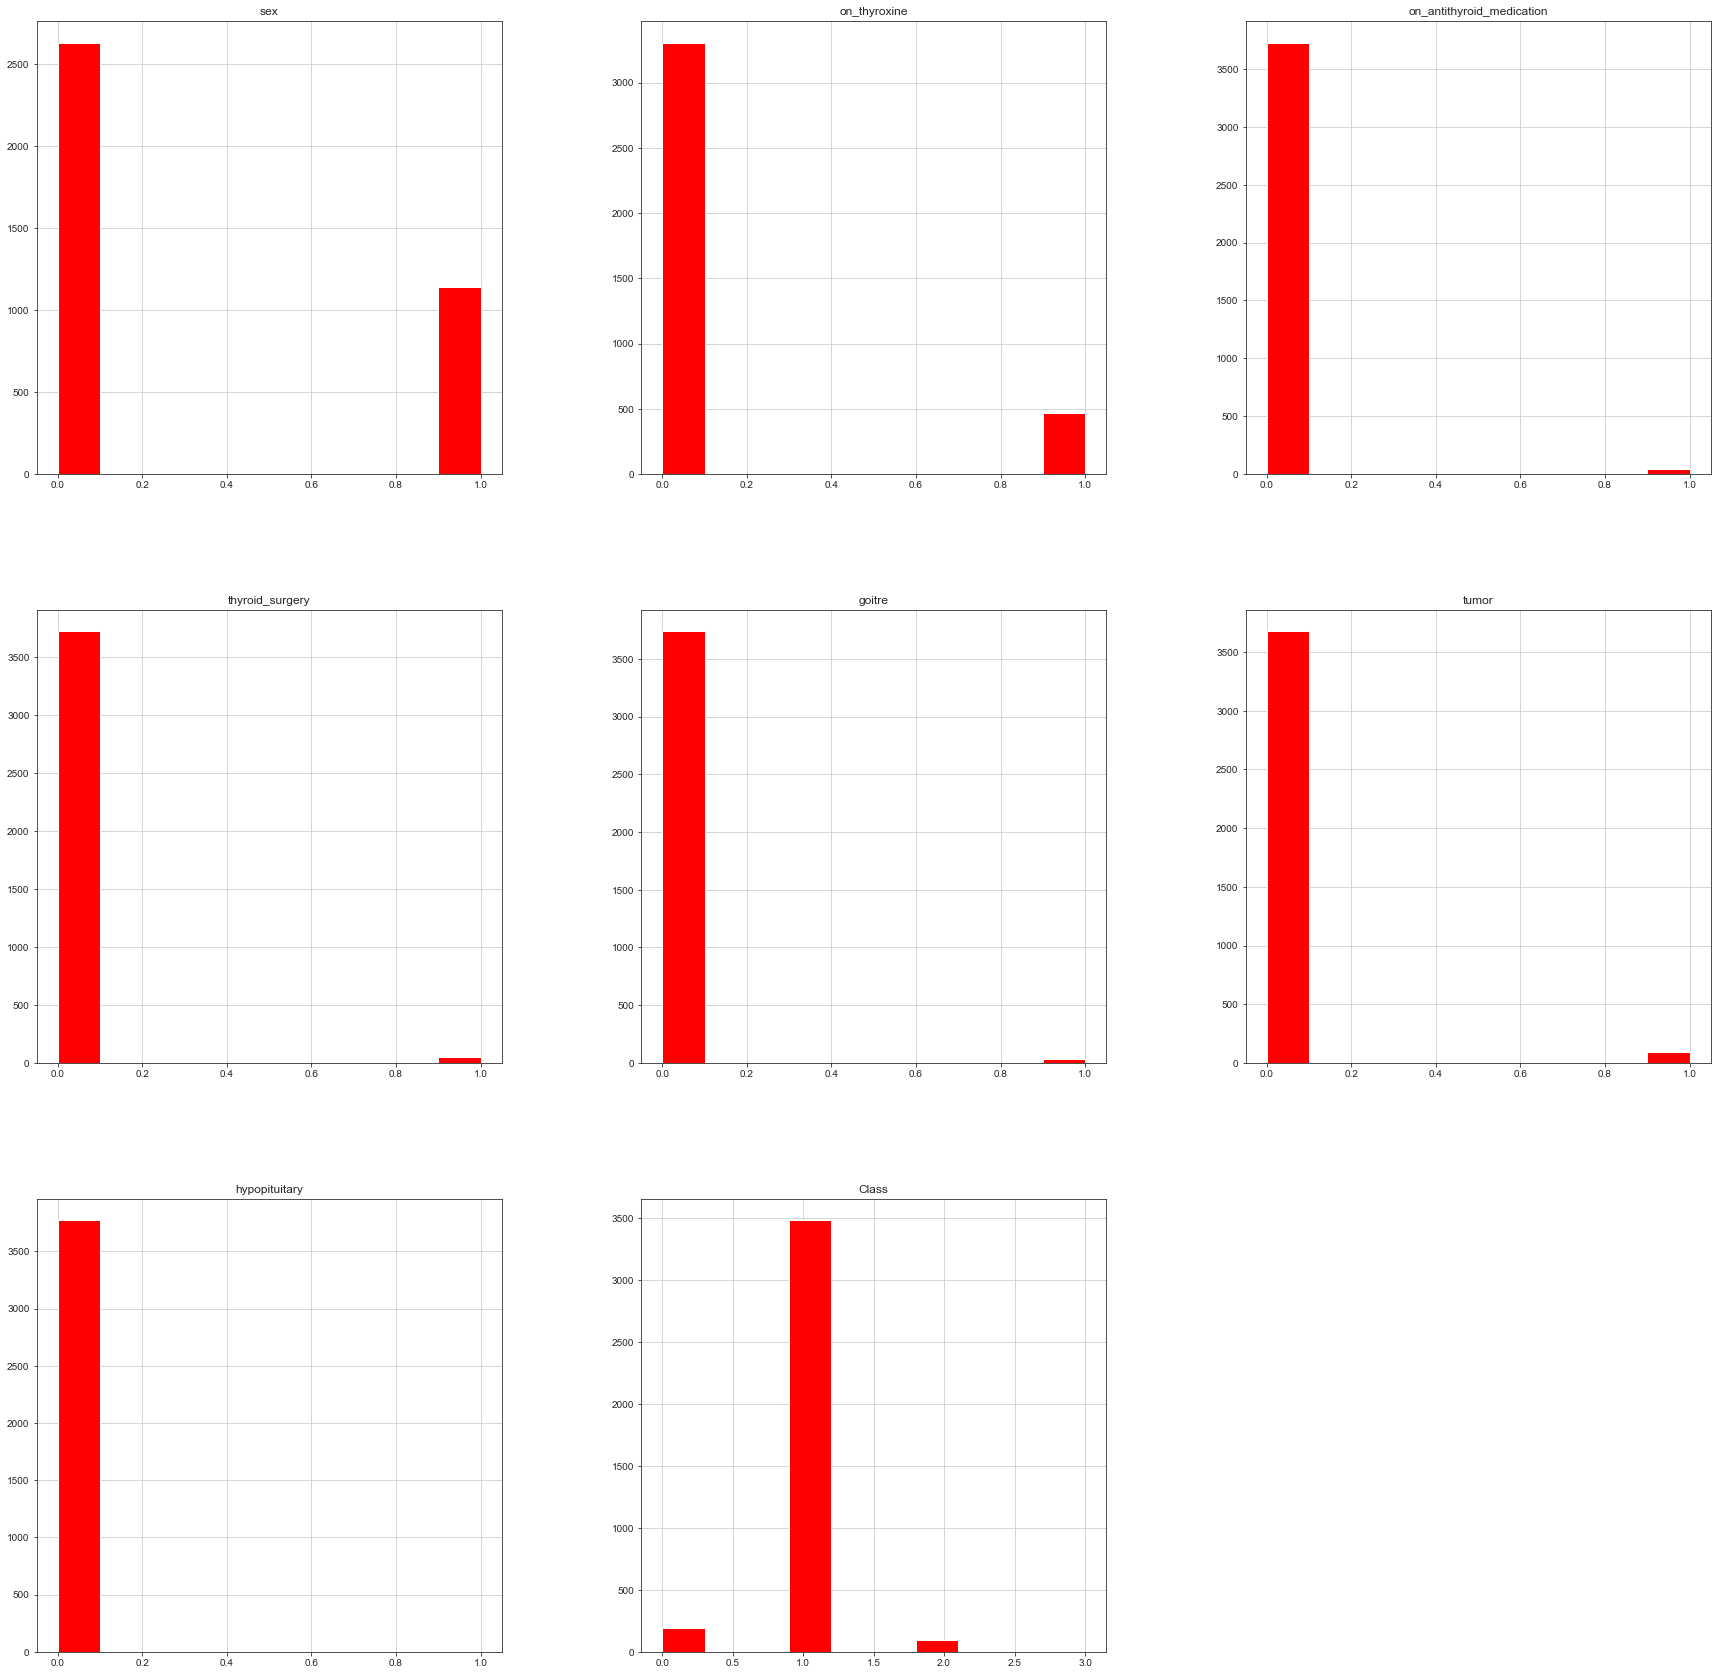

In [216]:
sns.set_style("ticks")
df.hist(figsize=(30,30),color="red")
plt.show()

In [92]:
df.corr()

,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,Class
sex,1.000000,-0.095709,-0.027278,-0.034543,0.010417,-0.073514,0.024712,0.022220
on_thyroxine,-0.095709,1.000000,-0.002201,0.037583,-0.010098,-0.029773,-0.006099,0.059745
on_antithyroid_medication,-0.027278,-0.002201,1.000000,-0.012819,-0.010241,-0.017353,-0.001749,0.000741
thyroid_surgery,-0.034543,0.037583,-0.012819,1.000000,-0.011385,-0.004990,-0.001944,0.026877
goitre,0.010417,-0.010098,-0.010241,-0.011385,1.000000,0.002399,-0.001553,0.008595
tumor,-0.073514,-0.029773,-0.017353,-0.004990,0.002399,1.000000,-0.002632,-0.009530
hypopituitary,0.024712,-0.006099,-0.001749,-0.001944,-0.001553,-0.002632,1.000000,0.001468
Class,0.022220,0.059745,0.000741,0.026877,0.008595,-0.009530,0.001468,1.000000


<AxesSubplot:>

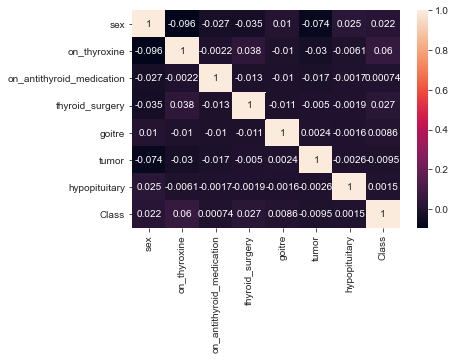

In [219]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

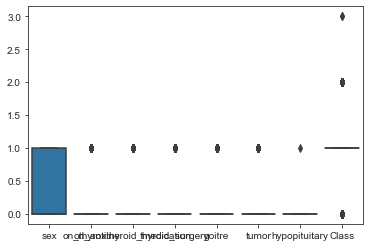

In [221]:
sns.boxplot(data=df)

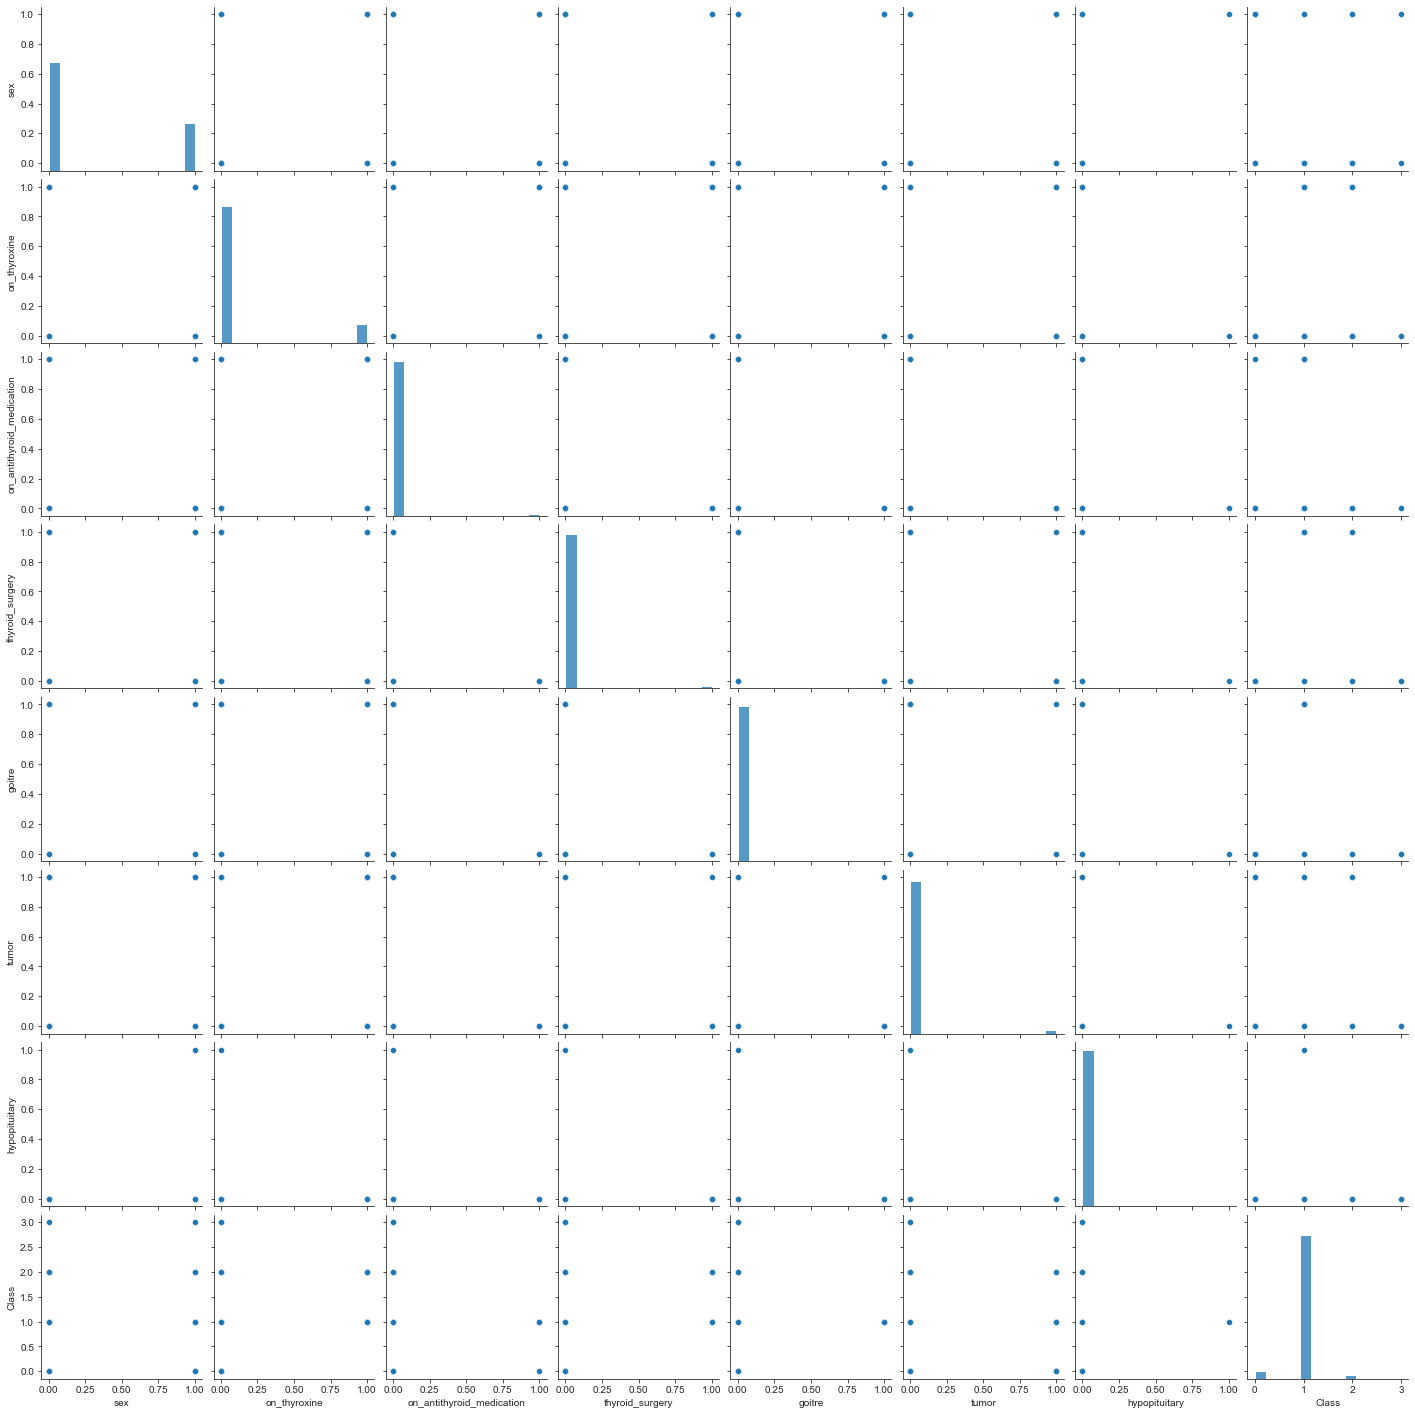

In [220]:
sns.pairplot(df)

In [93]:
# now we spitting data into x & y

In [94]:
df=df.dropna()

In [95]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'goitre', 'tumor', 'hypopituitary', 'TSH', 'TT4',
       'T4U', 'FTI', 'Class'],
      dtype='object')

In [96]:
x=df.drop(df["Class"])

In [97]:
df.shape

(3772, 13)

In [98]:
y=df["Class"].iloc[:3768]

In [99]:
x.shape

(3768, 13)

In [100]:
y.shape

(3768,)

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768 entries, 4 to 3771
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3768 non-null   object
 1   sex                        3768 non-null   int32 
 2   on_thyroxine               3768 non-null   int32 
 3   on_antithyroid_medication  3768 non-null   int32 
 4   thyroid_surgery            3768 non-null   int32 
 5   goitre                     3768 non-null   int32 
 6   tumor                      3768 non-null   int32 
 7   hypopituitary              3768 non-null   int32 
 8   TSH                        3768 non-null   object
 9   TT4                        3768 non-null   object
 10  T4U                        3768 non-null   object
 11  FTI                        3768 non-null   object
 12  Class                      3768 non-null   int32 
dtypes: int32(8), object(5)
memory usage: 294.4+ KB


In [102]:
x=x.astype("float")

In [103]:
x=x.drop(["Class"],axis=1)

In [104]:
y=y.astype("float")

In [105]:
y.dtype

dtype('float64')

In [106]:
x

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,goitre,tumor,hypopituitary,TSH,TT4,T4U,FTI
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.72,61.0,0.87,70.0
5,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.03,183.0,1.30,141.0
6,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,72.0,0.92,78.0
7,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.20,80.0,0.70,115.0
8,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.60,123.0,0.93,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,101.0,0.99,100.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,124.0,1.08,114.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.10,112.0,1.07,105.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,82.0,0.94,87.0


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [109]:
from xgboost import XGBClassifier

In [110]:
xgb=XGBClassifier(booster='gbtree',learning_rate=0.300000012,gamma=0,base_score=0.5,n_estimators=100,verbosity=1)

In [111]:
xgb.fit(x_train,y_train)

[19:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [112]:
xgb.score(x_test,y_test)

0.9062776304155614

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf=RandomForestClassifier(n_estimators=100)

In [115]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [116]:
rf.score(x_test,y_test)

0.9080459770114943

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
Lr=LogisticRegression()

In [119]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [120]:
Lr.score(x_test,y_test)

0.9098143236074271

In [121]:
from sklearn.svm import SVC

In [122]:
svc=SVC(kernel="rbf")

In [123]:
svc.fit(x_train,y_train)

SVC()

In [124]:
svc.score(x_test,y_test)

0.9098143236074271

In [125]:
# now we crete a function that gives the accurscy of models

In [126]:
def model(model):
    algorithm=model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print("-----"*15)
    print("the {} gives {} accuracy".format(algorithm,accuracy))
    print("-----"*15)
    
    

In [127]:
model(xgb)

[19:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------------------------------------------------------------
the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, 

In [128]:
model(rf)

---------------------------------------------------------------------------
the RandomForestClassifier() gives 0.9071618037135278 accuracy
---------------------------------------------------------------------------


In [129]:
model(svc)

---------------------------------------------------------------------------
the SVC() gives 0.9098143236074271 accuracy
---------------------------------------------------------------------------


In [130]:
model(Lr)

---------------------------------------------------------------------------
the LogisticRegression() gives 0.9098143236074271 accuracy
---------------------------------------------------------------------------


In [131]:
# for cross validation 

from sklearn.model_selection import cross_val_score

In [132]:
cross_val_score(Lr,x_train,y_train,cv=10)

array([0.9280303 , 0.9280303 , 0.9280303 , 0.9280303 , 0.9280303 ,
       0.9280303 , 0.92424242, 0.93155894, 0.92775665, 0.92775665])

In [133]:
np.mean(cross_val_score(Lr,x_train,y_train,cv=10))

0.9279496485770249

In [134]:
cross_val_score(xgb,x_train,y_train,cv=10)

[19:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.91666667, 0.9280303 , 0.92424242, 0.92424242, 0.92045455,
       0.92045455, 0.92424242, 0.93155894, 0.92015209, 0.92395437])

In [135]:
np.mean(cross_val_score(Lr,x_train,y_train,cv=10))

0.9279496485770249

In [136]:
cross_val_score(Lr,x_train,y_train,cv=10)

array([0.9280303 , 0.9280303 , 0.9280303 , 0.9280303 , 0.9280303 ,
       0.9280303 , 0.92424242, 0.93155894, 0.92775665, 0.92775665])

In [137]:
np.mean(cross_val_score(Lr,x_train,y_train,cv=10))

0.9279496485770249

In [138]:
cross_val_score(rf,x_train,y_train,cv=10)

array([0.9280303 , 0.9280303 , 0.92424242, 0.9280303 , 0.9280303 ,
       0.9280303 , 0.9280303 , 0.93155894, 0.92395437, 0.92395437])

In [139]:
np.mean(cross_val_score(Lr,x_train,y_train,cv=10))

0.9279496485770249

In [140]:
predictions=Lr.predict(x_test)

In [141]:
# for evaluation

In [142]:
from sklearn.metrics import classification_report,accuracy_score

In [143]:
accuracy_score(predictions,y_test)

0.9098143236074271

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.91      1.00      0.95      1029
         2.0       0.00      0.00      0.00        38

    accuracy                           0.91      1131
   macro avg       0.30      0.33      0.32      1131
weighted avg       0.83      0.91      0.87      1131



In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
confusion_matrix(y_test,predictions)

array([[   0,   64,    0],
       [   0, 1029,    0],
       [   0,   38,    0]], dtype=int64)

In [147]:
pred=confusion_matrix(y_test,predictions)

<AxesSubplot:>

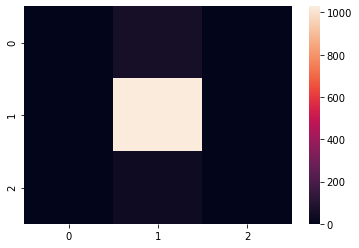

In [148]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [149]:
import pickle

In [150]:
pickle.dump(xgb,open("thyroid.pkl","wb"))

In [151]:
model=pickle.load(open("thyroid.pkl","rb"))

In [152]:
data=[64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,99.0,1.07,92.0]

In [153]:
from numpy import asarray

In [154]:
new_data=asarray([data])

In [155]:
model.predict(new_data)[0]

1.0

In [156]:
pd.DataFrame({"actual":y_test,"predicted":predictions})

,actual,predicted
880,1.0,1.0
2457,1.0,1.0
3543,1.0,1.0
2323,1.0,1.0
1766,1.0,1.0
...,...,...
707,1.0,1.0
1103,1.0,1.0
1772,1.0,1.0
370,1.0,1.0
